## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

  - Which variables are significant in predicting the price of a house, and
  - How well those variables describe the price of a house.

Code is divided into 4 section
 - Data Loading and Exploration
 - Data Cleaning
 - Data Preparation
 - Model Building and Evaluation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE

import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# for suppressing warnings
import warnings


import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)

missing_value_precent = lambda df, col: (df[col].isnull().sum())/len(df)
uniqueness_precent = lambda df, col: len(df[col].unique())/len(df)


In [4]:
# reading the dataset
df = pd.read_csv("train.csv")

In [5]:
col_info = pd.DataFrame([{'name': col, 
                                  'dtype': str(df[col].dtype), 
                                  'NaN_percent': missing_value_precent(df,col),
                                  'uniqueness_precent': uniqueness_precent(df, col)}
                         for col in df.columns])

In [6]:
numerical_col_df = col_info[col_info['dtype'].isin(['float64','float', 'int64'])].sort_values('NaN_percent', ascending=False)
categorical_col_df = col_info[col_info['dtype'].isin(['object'])].sort_values('NaN_percent', ascending=False)

In [7]:
print("No of Numerical Column", len(numerical_col_df))
numerical_col_df

No of Numerical Column 38


,name,dtype,NaN_percent,uniqueness_precent
3,LotFrontage,float64,0.177397,0.076027
59,GarageYrBlt,float64,0.055479,0.067123
26,MasVnrArea,float64,0.005479,0.224658
0,Id,int64,0.000000,1.000000
67,OpenPorchSF,int64,0.000000,0.138356
52,KitchenAbvGr,int64,0.000000,0.002740
54,TotRmsAbvGrd,int64,0.000000,0.008219
56,Fireplaces,int64,0.000000,0.002740
61,GarageCars,int64,0.000000,0.003425
62,GarageArea,int64,0.000000,0.302055


In [8]:
print("No of Categorical Column", len(categorical_col_df))
categorical_col_df

No of Categorical Column 43


,name,dtype,NaN_percent,uniqueness_precent
72,PoolQC,object,0.995205,0.002740
74,MiscFeature,object,0.963014,0.003425
6,Alley,object,0.937671,0.002055
73,Fence,object,0.807534,0.003425
25,MasVnrType,object,0.597260,0.002740
57,FireplaceQu,object,0.472603,0.004110
58,GarageType,object,0.055479,0.004795
64,GarageCond,object,0.055479,0.004110
63,GarageQual,object,0.055479,0.004110
60,GarageFinish,object,0.055479,0.002740


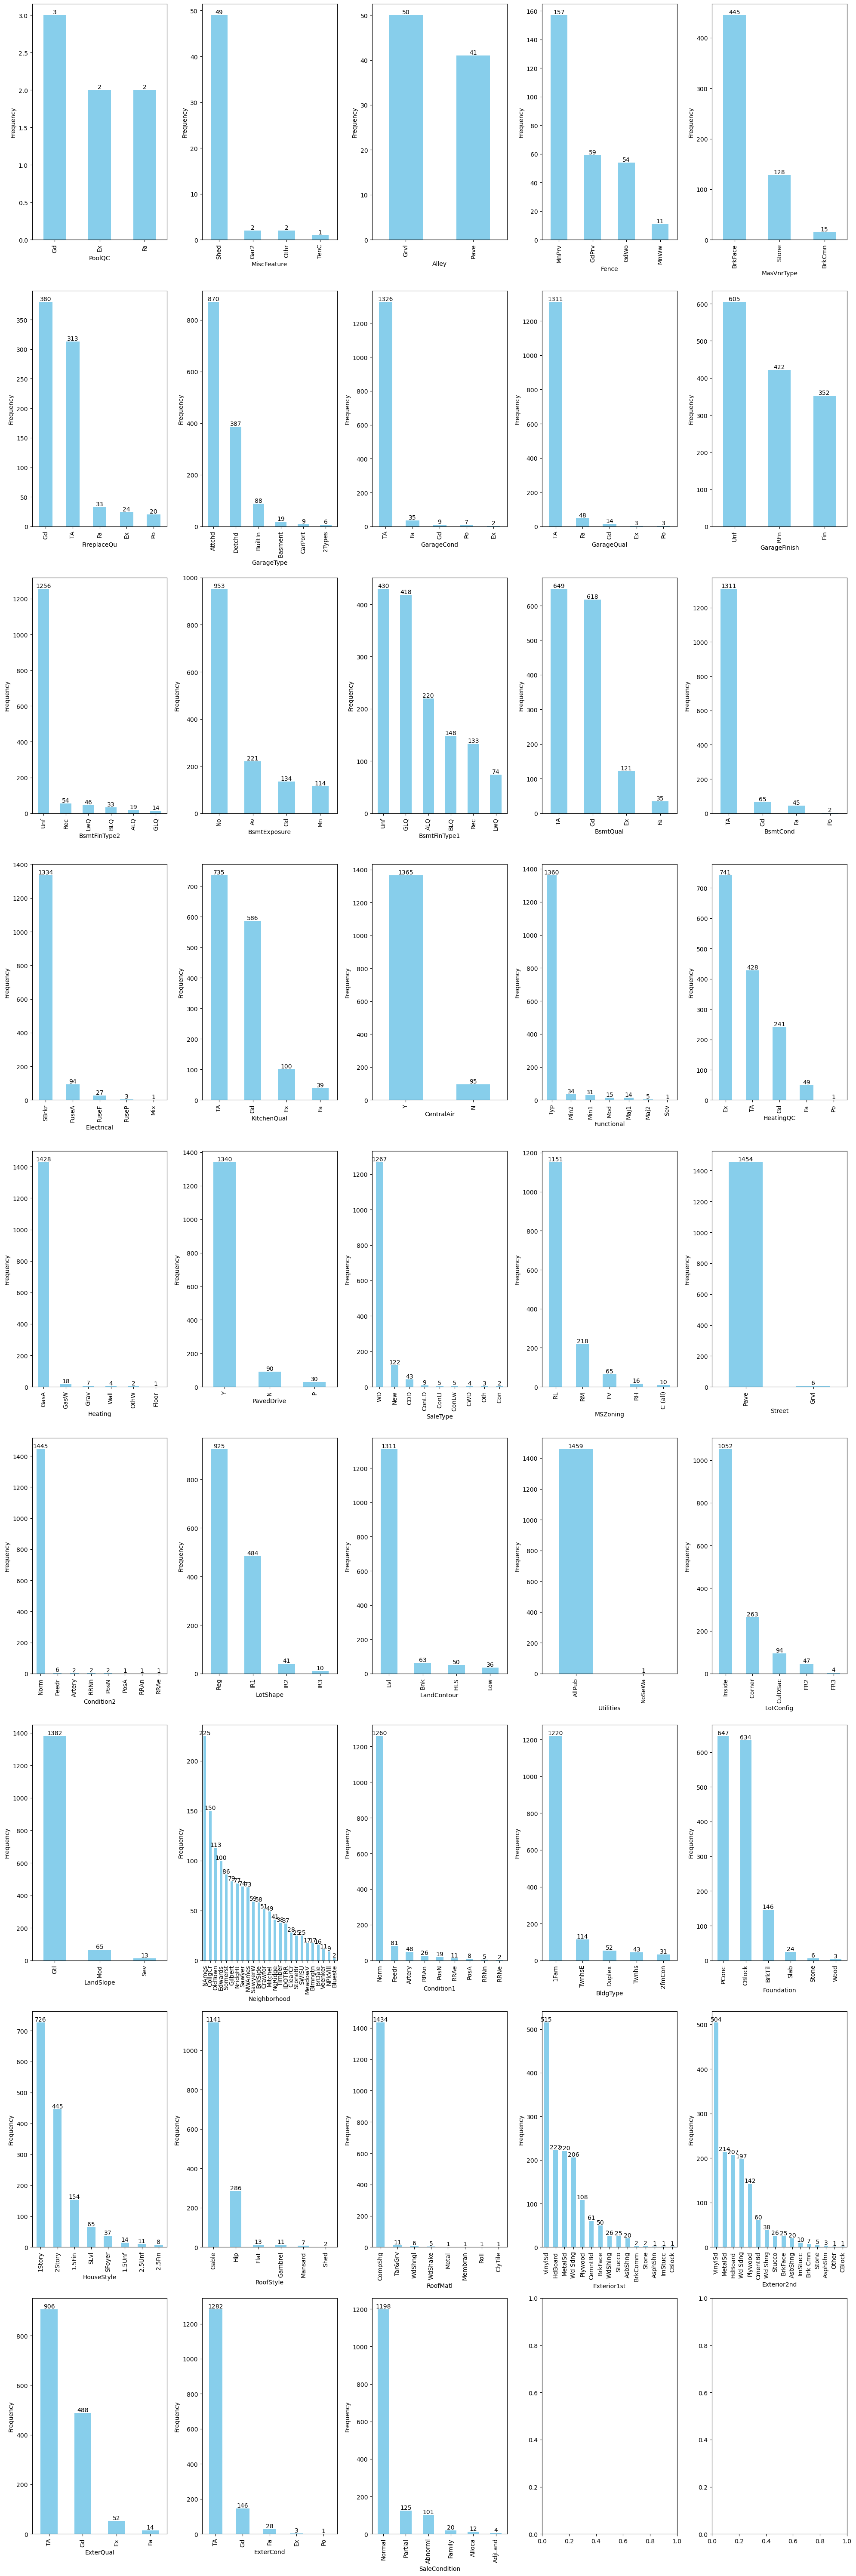

In [9]:
# Calculate the number of rows and columns for subplots
num_cols = 5
num_rows = round(len(categorical_col_df['name'].unique()) // num_cols) + 1 

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 60))


# Plot histograms for each categorical column
for i, column in enumerate(categorical_col_df['name'].unique()):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]
    df[column].value_counts().plot(kind='bar', ax=ax, color='skyblue')
    ax.set_ylabel('Frequency')
    for j, count in enumerate(df[column].value_counts()):
        ax.text(j, count, str(count), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

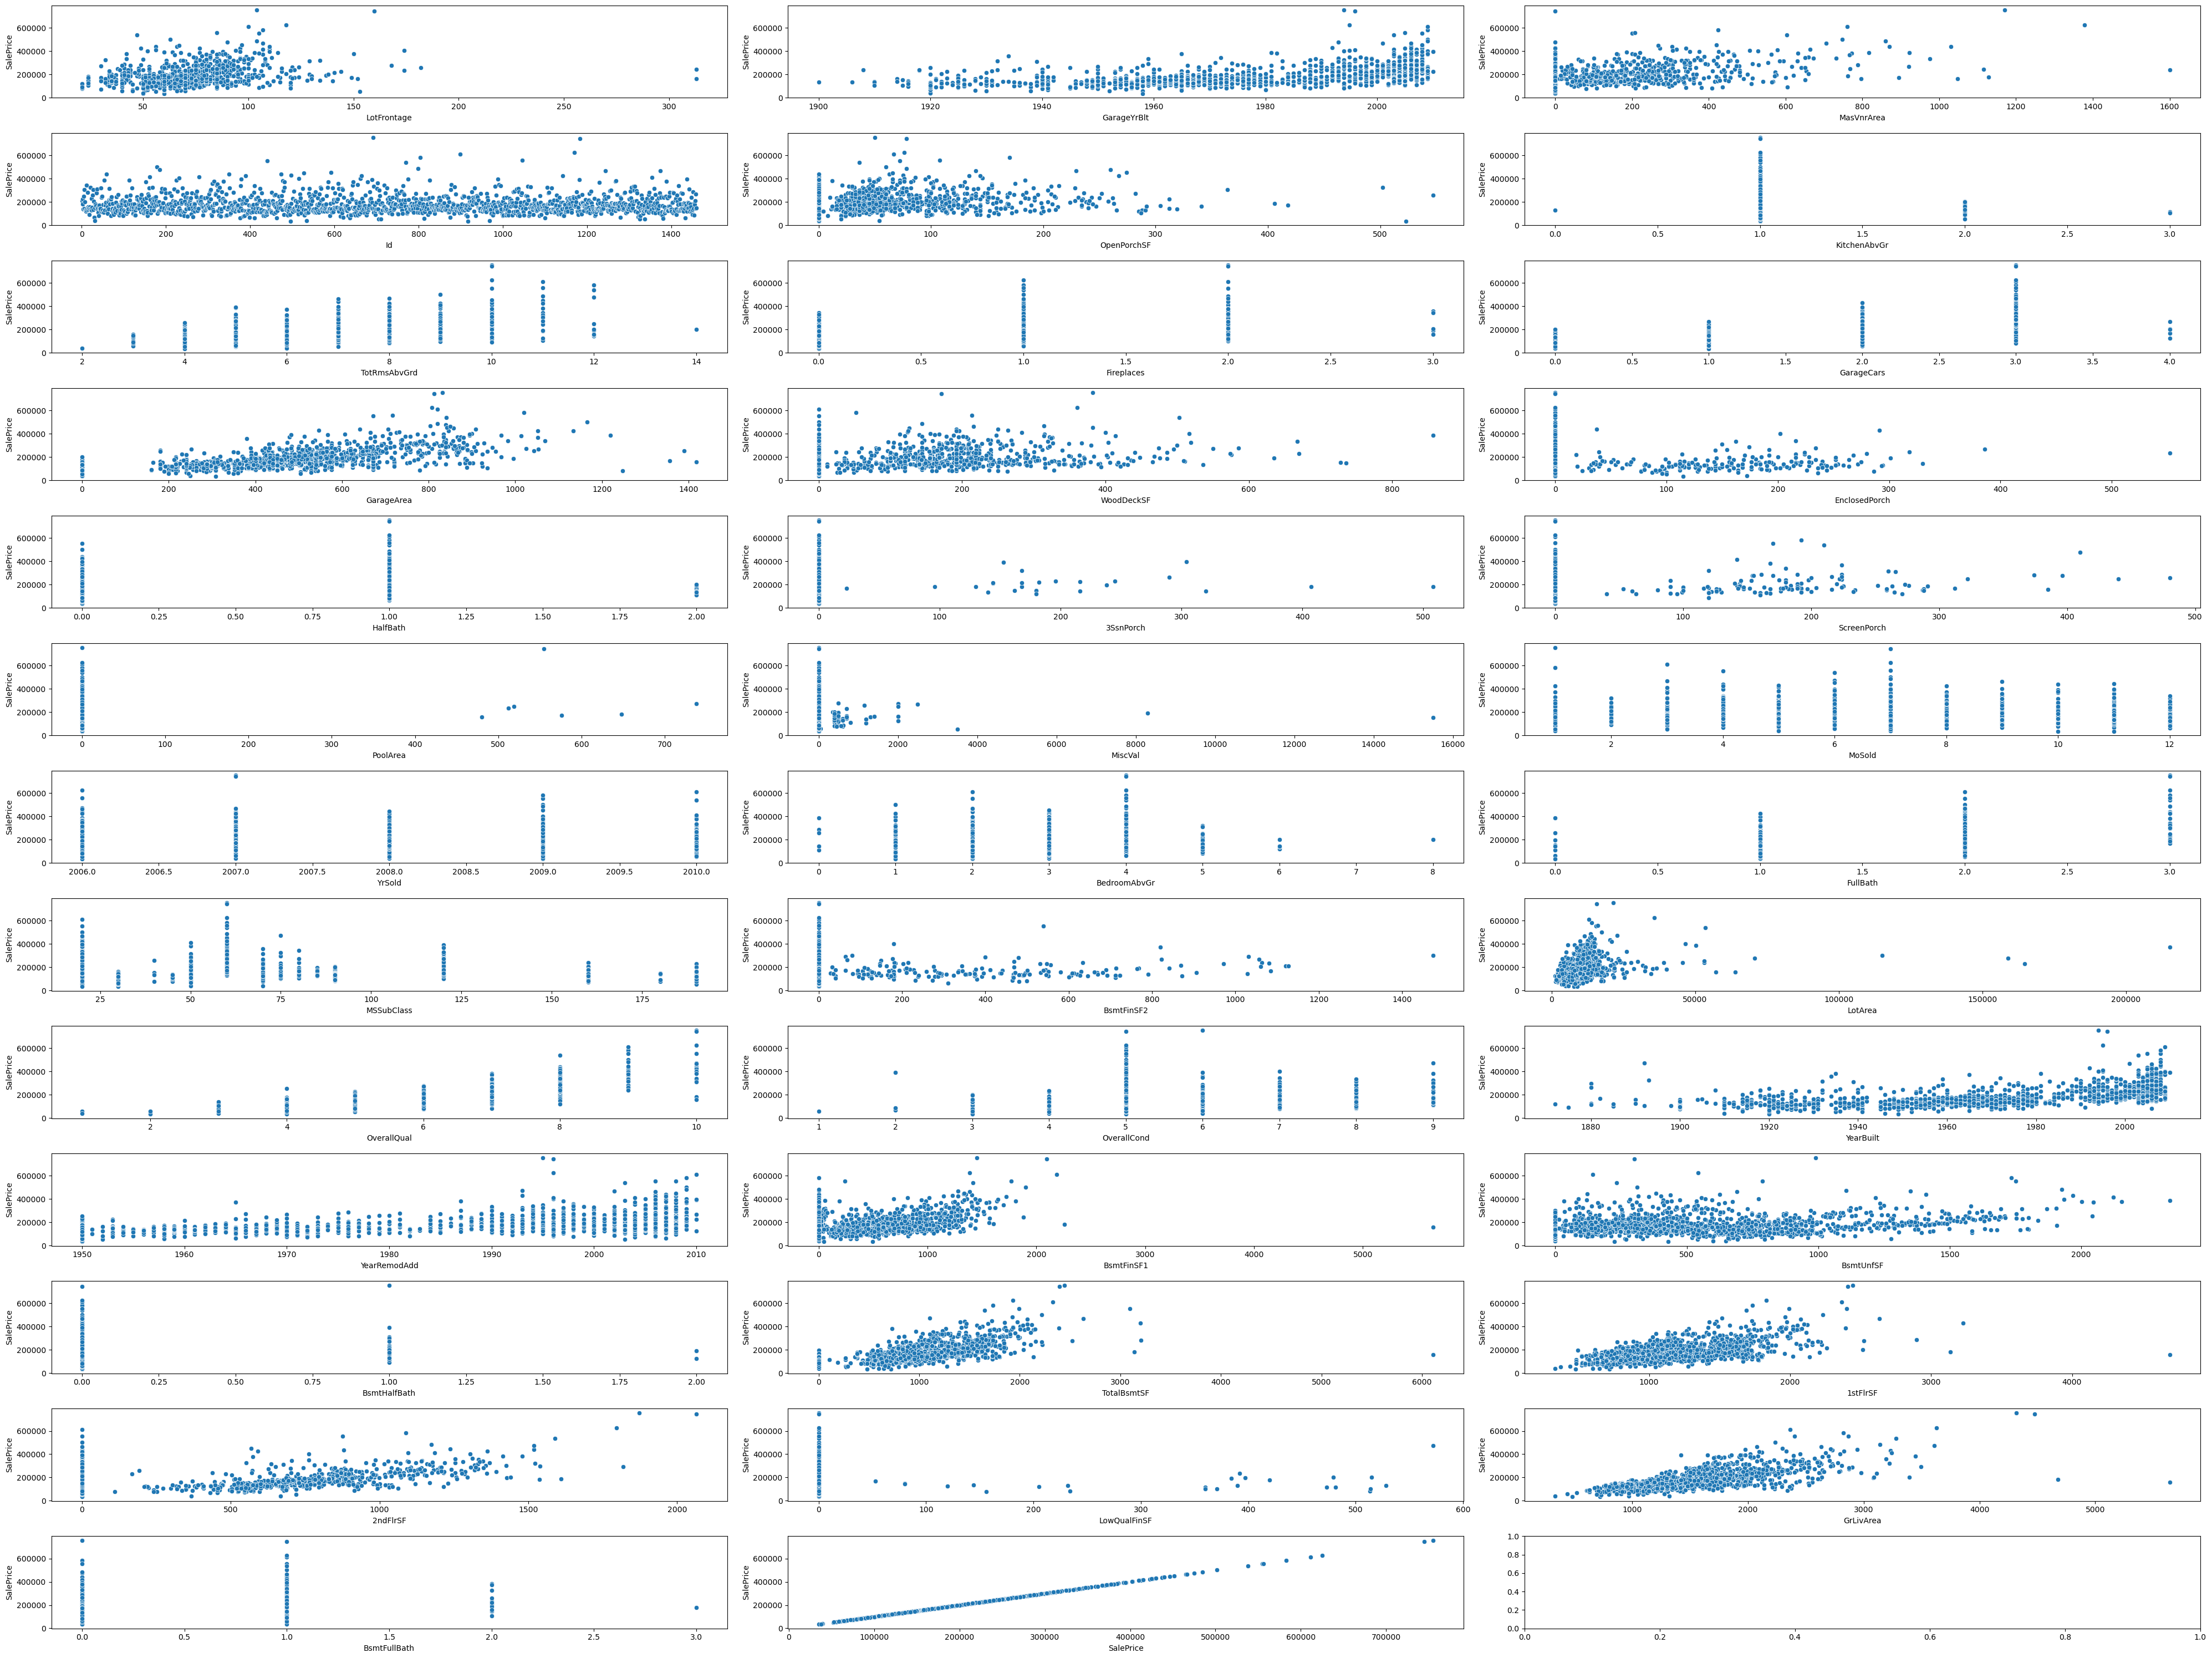

In [10]:
# Calculate the number of rows and columns for subplots
num_cols = 3
num_rows = round(len(numerical_col_df['name'].unique()) // num_cols) + 1 

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(40, 30))

for i, feature in enumerate(numerical_col_df['name']):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]

    sns.scatterplot(data=df, x= feature, y='SalePrice', ax =ax)
    plt.tight_layout()

In [11]:
# Unique values and there percent
df.value_counts()


Series([], Name: count, dtype: int64)

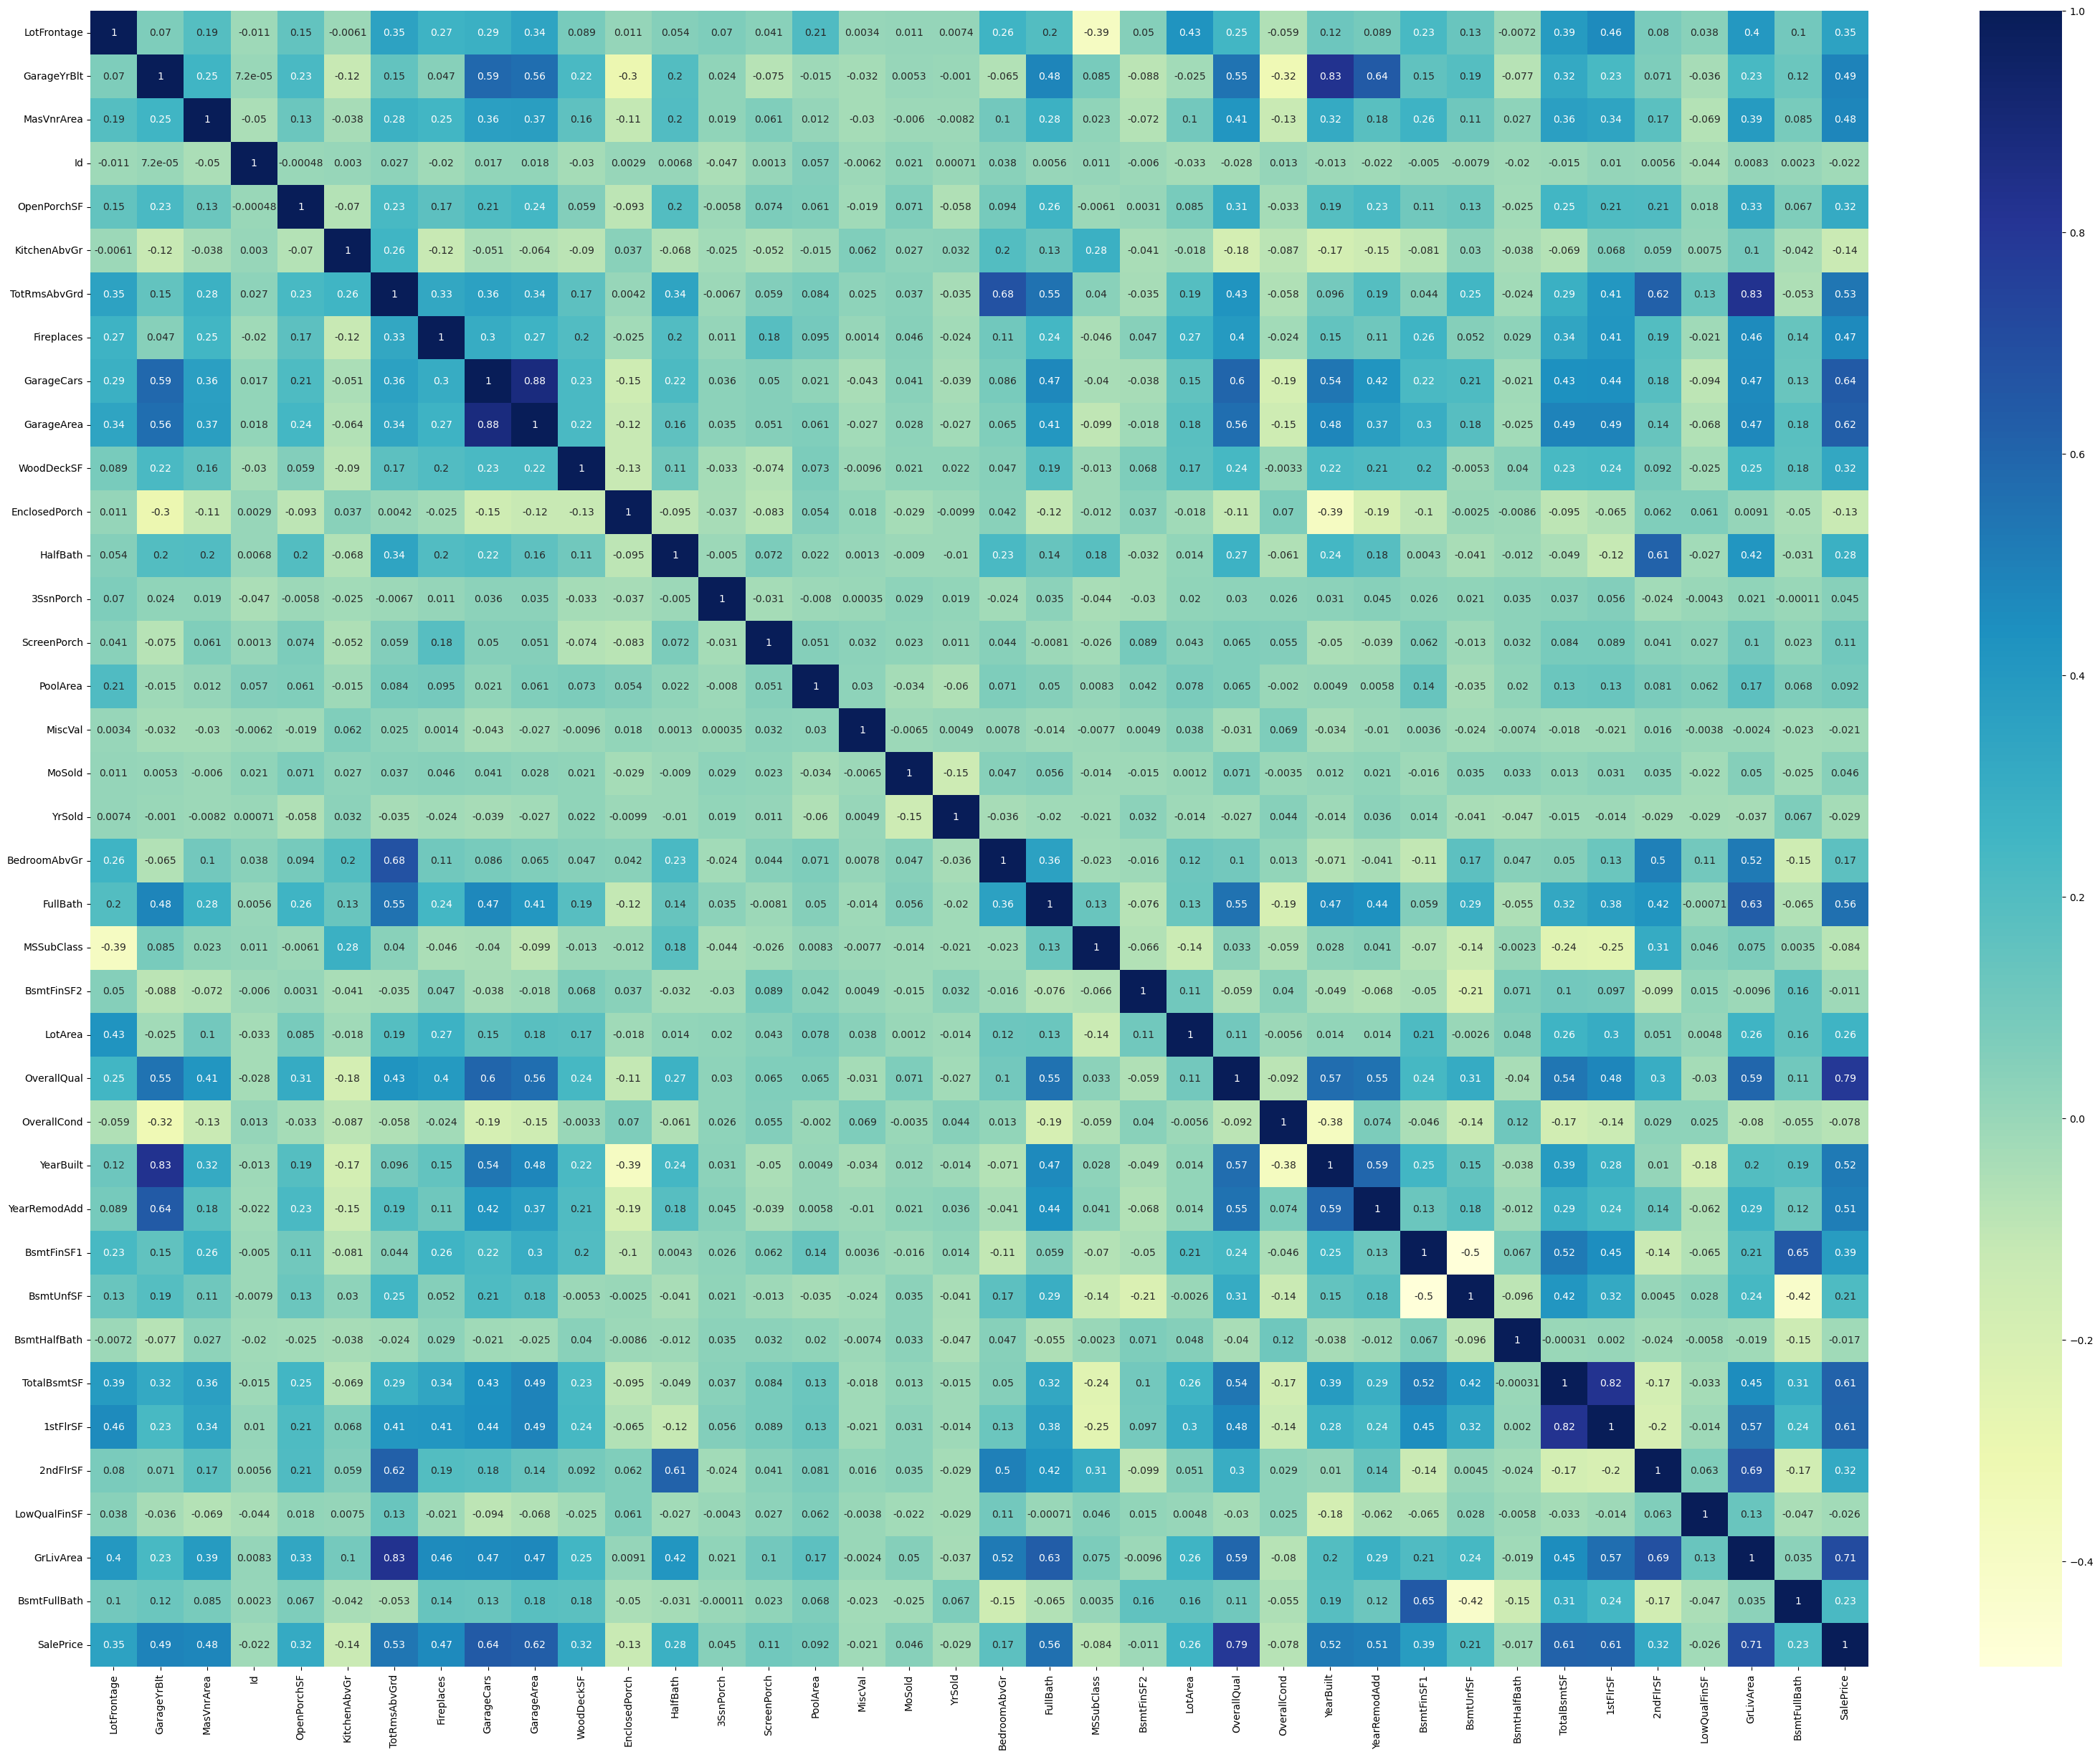

In [12]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(40,30))
corr_matrix = df[numerical_col_df['name'].unique()].corr()

# heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

In [13]:
#list of columns for which more the 50% of data is null or na or blank
percentage_null = (df.isnull().sum() / len(df))

print("Percentage of null or empty values in numerical columns:")
print(percentage_null[percentage_null >= 0.5].sort_values(ascending=False))

Percentage of null or empty values in numerical columns:
PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
MasVnrType     0.597260
dtype: float64


In [456]:
#list of categorical columns for which one category as dominating
for col in df.select_dtypes(include='object'):
    max_value = round(df[col].value_counts(normalize=True).max(), 3)
    if max_value > 0.95:
        print(col, max_value)


Street 0.996
Utilities 0.999
Condition2 0.99
RoofMatl 0.982
Heating 0.978
PoolQC 0.995
MiscFeature 0.963


**Observation:**
 - No of records: 1460, No. of feature: 81
 - Below numerical columns and percent of missing value 
     - LotFrontage :0.177397
     - GarageYrBlt :0.055479
     - MasVnrArea  :0.005479

 - Below categorical columns has one highly dominating column(more then 95% of data belongs to one category)
      - Street 0.996
      - Utilities  : 0.999
      - Condition2 : 0.99
      - RoofMatl   : 0.982
      - Heating    : 0.978
      - GarageQual : 0.951
      - GarageCond : 0.962
     
     
 - Percentage of null or empty values in categorical columns:
     - PoolQC        : 99.520548
     - MiscFeature   : 96.301370
     - Alley         : 93.767123
     - Fence         : 80.753425
     - MasVnrType    : 59.726027
 - Columns where null is allowed
     - Alley: No Access To Alley
     - BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 : No basement
     - FireplaceQu: No fireplace
     - GarageType, GarageFinish, GarageCond: No Garage
     - PoolQC: No Pool
     - Fence: No Fence     

 - Numeric Column which are categorical
     - OverallQual
     - OverallCond
     
 - Observation from heat map
     - GarageYrBlt to YearBuilt : 0.83
     - 1stFlrSF to TotalBsmtSF : 0.82
     - TotRmsAbvGrd to GrLivArea: 0.83
     - GarageCars to GarageArea : 0.88
     

 - Column which are highly coorelated with SalePrice
     - OverallQual
     - YearBuilt
     - YearRemodAdd
     - TotalBsmtSF
     - 1stFlrSF
     - GrLivArea
     - FullBath
     - TotRmsAbvGrd
     - GarageCars
     - GarageArea


### Step 2: Data Cleaning

- Replace NaN with Not Applicable for columns where null is allowed
- Converting the year related features into number of years
- Remove highly coorelated columns
- Remove column which does not have any significance in predictions
- Remove column which has one category has highly dominating

In [698]:
#Replace NaN with Not Applicable for columns where null is allowed

nulls_allowed = ['Alley','MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
df[nulls_allowed] = df[nulls_allowed].fillna(value='not_applicable', axis=1)

In [700]:
# Converting the year related features into number of years
for col in ['YearBuilt','YearRemodAdd', 'YrSold']:
    df[col] = 2024 - df[col]

In [702]:

print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in df.columns:
    if df[feat].isnull().any():
        print(feat, ' : ',  round(df[feat].isnull().sum()/df.shape[0], 6)*100)

Feature : Percentage of Missing Value
LotFrontage  :  17.7119
GarageYrBlt  :  5.5824
GarageQual  :  5.5824


In [704]:
#dropping the rows for which MasVnrArea as it only drop 1% of records
df = df[~df['MasVnrArea'].isnull()]
df = df[~df['Electrical'].isnull()]


In [706]:
# drop columns which are highly coorelated, no business use case, has highly dominating category
col_to_drop = ['GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'GarageCars', 'Id', 'MoSold', 'PoolQC', 'MiscFeature', 'Alley']
dominating_class_percent = { col: df[col].value_counts(normalize=True).max() for col in df.select_dtypes(include=['object'])  }

# dropping the columns which has more then 90% of data belonging to one category
col_to_drop.extend([key for key in dominating_class_percent if dominating_class_percent[key] > 0.95])


clean_df = df.drop(col_to_drop, axis=1)

In [708]:
outliers_percentage={}
numeric_df = clean_df.select_dtypes(include=['int', 'float'])
for feature in numeric_df.columns:
    IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
    outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = clean_df[feature].quantile(.75) - clean_df[feature].quantile(.25) 
        max_value = clean_df[feature].quantile(.75)+1.5*IQR
        min_value = clean_df[feature].quantile(.25)-1.5*IQR
        clean_df[feature][clean_df[feature] > max_value] = max_value
        clean_df[feature][clean_df[feature] < min_value ] = min_value

### Step 3: Data Preparation
 - Scaling
 - dummy variable
 - Train Test Split
 - Impute LotFrontage 

In [745]:
X = clean_df.drop(['SalePrice'], axis=1)
y = clean_df['SalePrice']


In [747]:
#  creating dummy variable
categorical_columns = X.select_dtypes(include=['object'])
dummies = pd.get_dummies(categorical_columns, drop_first=True, dtype='int')


# drop categorical variables 
X = X.drop(list(categorical_columns), axis=1)

# concat dummy variables with X
X = pd.concat([X, dummies], axis=1)


In [749]:
ss = StandardScaler()
ss.fit(X)

X_scaled = pd.DataFrame(data=ss.transform(X), columns=X.columns)

X_scaled.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1451.0,1194.0,1451.0,1451.0,1451.0,1451.0,1451.0,1451.0,1451.0,1451.0,...,1451.0,1451.0,1451.0,1451.0,1451.0,1451.0,1451.0,1451.0,1451.0,1451.0
mean,-3.91753403589304e-17,-1.6067549301107794e-16,4.4378315250350844e-18,2.93815052691978e-17,-1.4935598511842216e-16,1.6196554779645288e-15,-2.3750050092601558e-15,8.814451580759341e-17,2.2036128951898352e-17,0.0,...,-9.7938350897326e-18,-1.2242293862165751e-17,2.4484587724331502e-17,1.95876701794652e-17,1.4690752634598902e-16,-2.44845877243315e-18,-3.1217849348522664e-17,-4.284802851758013e-17,8.692028642137683e-17,4.4072257903796704e-17
std,1.0003447681536652,1.0004190236932267,1.0003447681536664,1.0003447681536686,1.0003447681536768,1.0003447681536666,1.0003447681536681,1.0003447681536612,1.000344768153663,0.0,...,1.000344768153633,1.0003447681536402,1.0003447681536706,1.0003447681536706,1.0003447681536572,1.0003447681536426,1.0003447681536464,1.0003447681536572,1.0003447681536695,1.0003447681536541
min,-0.9357434831260817,-2.118462798043722,-2.2812075832499152,-2.975236032619833,-2.123575798069118,-2.862696143156718,-1.6837725322543478,-0.6690238878063302,-1.0152731297409183,0.0,...,-0.05880318580769382,-0.05880318580769382,-0.2988968707419657,-0.04551728467758034,-2.5762069220586987,-0.052576991296780194,-0.08740073734751262,-0.11822115035531812,-2.1503560188377966,-0.3029824163545057
25%,-0.9357434831260817,-0.5146160157569927,-0.5860437427936085,-0.7956327929708708,-0.5676213377097729,-0.5691901082615657,-0.9087370799313135,-0.6690238878063302,-1.0152731297409183,0.0,...,-0.05880318580769382,-0.05880318580769382,-0.2988968707419657,-0.04551728467758034,0.3881675774711761,-0.052576991296780194,-0.08740073734751262,-0.11822115035531812,0.4650392731434632,-0.3029824163545057
50%,-0.136196642013542,-0.005458307094539011,-0.046512211541915115,-0.06909837975455013,-0.5676213377097729,0.029115813884995873,0.399135245863807,-0.6690238878063302,-0.13322586414460313,0.0,...,-0.05880318580769382,-0.05880318580769382,-0.2988968707419657,-0.04551728467758034,0.3881675774711761,-0.052576991296780194,-0.08740073734751262,-0.11822115035531812,0.4650392731434632,-0.3029824163545057
75%,0.39683458539481775,0.55461517243416,0.5440654841772625,0.6574360334617705,0.46968163586312417,0.9598139150018694,0.9319721193358932,0.5614765570684744,0.6214917436884644,0.0,...,-0.05880318580769382,-0.05880318580769382,-0.2988968707419657,-0.04551728467758034,0.3881675774711761,-0.052576991296780194,-0.08740073734751262,-0.11822115035531812,0.4650392731434632,-0.3029824163545057
max,2.395701688176167,2.158461954720889,2.2392293246335693,2.8370392731107326,2.0256360962224695,1.2922060939721813,1.222610413957031,2.4072272243806814,3.076639053832538,0.0,...,17.00588133558505,17.00588133558505,3.345635561582339,21.969676071045445,0.3881675774711761,19.019726601610234,11.441551070947106,8.45872330792301,0.4650392731434632,3.300521568320804


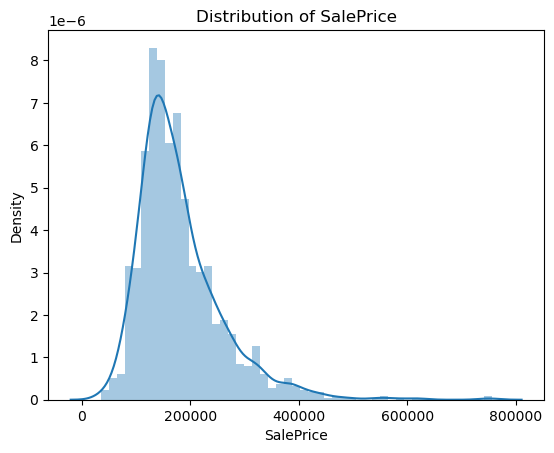

In [751]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(df['SalePrice'])
plt.show()

Text(0.5, 1.0, 'Distribution of log transformed SalePrice')

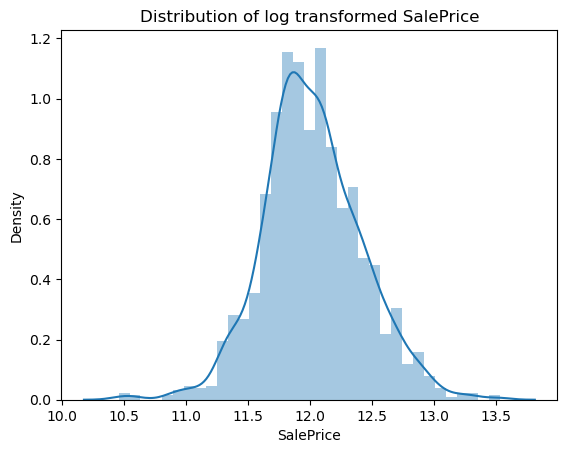

In [753]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(df['SalePrice'])
sns.distplot(np.log(df['SalePrice']))
plt.title('Distribution of log transformed SalePrice')

In [720]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [722]:
# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

len(X_train.columns)

219

### Step 4: Model Building and Evaluation

### **Linear Regression**

In [755]:
top_n_cols = list()
n =  50# after multiple attempt 40 gives better R2 value for train and test

linear_m = LinearRegression()
linear_m.fit(X_train, y_train)
rfe = RFE(linear_m, n_features_to_select=n)
rfe = rfe.fit(X_train, y_train)
    

rfe_ranking = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
    
for i in rfe_ranking:
    if i[1]:
        top_n_cols.append(i[0])
print("Top %d features : " %len(top_n_cols))
print(top_n_cols)

Top 50 features : 
['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'GarageArea', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Condition1_Norm', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'ExterCond_Fa', 'ExterCond_Po', 'ExterCond_TA', 'Foundation_PConc', 'BsmtQual_not_applicable', 'BsmtCond_Po', 'BsmtCond_not_applicable', 'BsmtFinType1_not_applicable', 'CentralAir_Y', 'Electrical_Mix', 'Functional_Min2', 'Functional_Typ', 'FireplaceQu_Gd', 'FireplaceQu_TA', 'GarageType_not_applicable', 'GarageFinish_not_applicable', 'GarageCond_not_applicable', 'SaleType_New', 'SaleCondition_Normal', 'SaleCondition_Partial']


In [756]:
X_train_rfe = sm.add_constant(X_train[top_n_cols], has_constant='add')
X_test_rfe = sm.add_constant(X_test[top_n_cols], has_constant='add')
len(X_train_rfe.columns)

51

In [757]:
lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_rfe).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     314.6
Date:                Thu, 11 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:41:28   Log-Likelihood:                 732.27
No. Observations:                1015   AIC:                            -1397.
Df Residuals:                     981   BIC:                            -1229.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [758]:

y_pred_train = lin_reg.predict(X_train_rfe)
y_pred_test = lin_reg.predict(X_test_rfe)


metric_lr = {'Algo Type': 'Linear Regression'}

# R2 Score
r2_train_lr = r2_score(y_train, y_pred_train)
r2_test_lr = r2_score(y_test, y_pred_test)

metric_lr['R2 Score(Train)'] = r2_train_lr
metric_lr['R2 Score(Test)'] = r2_test_lr

# RSS
rss1_lr = np.sum(np.square(y_train - y_pred_train))
rss1_lr = np.sum(np.square(y_test - y_pred_test))

metric_lr['RSS (Train)'] = r2_train_lr
metric_lr['RSS (Test)'] = r2_test_lr


# RMSE Error
mse_train_lr = mean_squared_error(y_train, y_pred_train)
mse_test_lr = mean_squared_error(y_test, y_pred_test)

metric_lr['RMSE (Train)'] = mse_train_lr**0.5
metric_lr['RMSE (Test)'] = mse_test_lr**0.5

for key, value in metric_lr.items():
    print(f"{key} : {value}")

Algo Type : Linear Regression
R2 Score(Train) : 0.913674520708977
R2 Score(Test) : -3.5323384056732117
RSS (Train) : 0.913674520708977
RSS (Test) : -3.5323384056732117
RMSE (Train) : 0.11760880465196819
RMSE (Test) : 0.8451998838402767


## Ridge

In [803]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train_rfe, y_train) 
final_model_ridge  = model_cv_ridge.best_estimator_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [804]:
# Printing the best hyperparameter alpha
print(model_cv_ridge.best_params_)

{'alpha': 3.0}


In [807]:
y_pred_train_ridge = final_model_ridge.predict(X_train_rfe)
y_pred_test_ridge = final_model_ridge.predict(X_test_rfe)

metric_rg = {'Algo Type': 'Ridge'}

# R2 Score
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)

metric_rg['R2 Score(Train)'] = r2_train_ridge
metric_rg['R2 Score(Test)'] = r2_test_ridge

# RSS
rss_train_ridge = np.sum(np.square(y_train - y_pred_train_ridge))
rss_test_ridge = np.sum(np.square(y_test - y_pred_test_ridge))

metric_rg['RSS (Train)'] = rss_train_ridge
metric_rg['RSS (Test)'] = rss_test_ridge

# Mean Square Error
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)

metric_rg['RMSE (Train)'] = mse_train_ridge**0.5
metric_rg['RMSE (Test)'] = mse_test_ridge**0.5



In [809]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_lasso.fit(X_train_rfe, y_train) 
final_model_lasso  = model_cv_lasso.best_estimator_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [810]:
# Printing the best hyperparameter alpha
print(model_cv_lasso.best_params_)

{'alpha': 0.0001}


In [813]:
y_pred_train_lasso = final_model_lasso.predict(X_train_rfe)
y_pred_test_lasso = final_model_lasso.predict(X_test_rfe)


metric_ls = {'Algo Type': 'Lasson'}

r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)

metric_ls['R2 Score(Train)'] = r2_train_ridge
metric_ls['R2 Score(Test)'] = r2_test_ridge



rss_train_lasso = np.sum(np.square(y_train - y_pred_train_lasso))
rss_test_lasso = np.sum(np.square(y_test - y_pred_test_lasso))

metric_ls['RSS (Train)'] = rss_train_lasso
metric_ls['RSS (Test)'] = rss_test_lasso

mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)


metric_ls['RMSE (Train)'] = mse_train_lasso**0.5
metric_ls['RMSE (Test)'] = mse_test_lasso**0.5

In [815]:
# Creating a table which contain all the metrics
lr_table = [ 
            metric_lr, 
            metric_rg, 
            metric_ls]

final_metric = pd.DataFrame(lr_table)

final_metric

,Algo Type,R2 Score(Train),R2 Score(Test),RSS (Train),RSS (Test),RMSE (Train),RMSE (Test)
0,Linear Regression,0.913674520708977,-3.5323384056732117,0.913674520708977,-3.5323384056732117,0.11760880465196819,0.8451998838402767
1,Ridge,0.9135085077226064,0.8956844410685468,14.066307463962147,7.168563013845868,0.11772183739212315,0.12822502988355008
2,Lasson,0.9135085077226064,0.8956844410685468,14.04352263588409,7.245536837250318,0.11762645490065846,0.12891161218122005


### Comparing Model Coefficients

In [824]:
pd.set_option('display.float_format', str)

model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=3.0)'] = final_model_ridge.coef_
model_coefficients['Lasso (alpha=0.001)'] = final_model_lasso.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=3.0),Lasso (alpha=0.001)
const,0.0,0.0
LotArea,0.039096140311850575,0.039033871411409626
OverallQual,0.09403180359403494,0.09379676121015712
OverallCond,0.04644334475931682,0.0461993697760571
YearBuilt,0.055153562036589755,0.05512154709283157
YearRemodAdd,0.03194168949931037,0.03171757883921121
BsmtFinSF2,0.0,0.0
BsmtUnfSF,-0.04523656785718421,-0.04536925036676123
TotalBsmtSF,0.09153057338653792,0.09007341345802553
2ndFlrSF,0.00628945342935266,0.0044026370762007385


### Final Model

Both lasso and ridge has same value for R-square and RMSE. However Lasso seems more simple due to less number of predictor variable. SO we will be using Lasso model as our final model

In [830]:
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)


,Lasso (alpha=0.001)
MSZoning_RL,0.16950516007171365
GrLivArea,0.1296114181388724
MSZoning_RM,0.1279947516800012
OverallQual,0.09379676121015712
MSZoning_FV,0.09344560317186196
TotalBsmtSF,0.09007341345802553
YearBuilt,0.05512154709283157
SaleType_New,0.05269408770355534
MSZoning_RH,0.04759656773970852
OverallCond,0.0461993697760571


In [832]:
# Top 10 predictors
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)[:10]


,Lasso (alpha=0.001)
MSZoning_RL,0.16950516007171365
GrLivArea,0.1296114181388724
MSZoning_RM,0.1279947516800012
OverallQual,0.09379676121015712
MSZoning_FV,0.09344560317186196
TotalBsmtSF,0.09007341345802553
YearBuilt,0.05512154709283157
SaleType_New,0.05269408770355534
MSZoning_RH,0.04759656773970852
OverallCond,0.0461993697760571


### Summary

1. **Top 50 columns for predictions :**[ 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'GarageArea', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Condition1_Norm',
       'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior2nd_CBlock', 'ExterCond_Fa', 'ExterCond_Po', 'ExterCond_TA',
       'Foundation_PConc', 'BsmtQual_not_applicable', 'BsmtCond_Po',
       'BsmtCond_not_applicable', 'BsmtFinType1_not_applicable',
       'CentralAir_Y', 'Electrical_Mix', 'Functional_Min2', 'Functional_Typ',
       'FireplaceQu_Gd', 'FireplaceQu_TA', 'GarageType_not_applicable',
       'GarageFinish_not_applicable', 'GarageCond_not_applicable',
       'SaleType_New', 'SaleCondition_Normal', 'SaleCondition_Partial']
2. Model evaluation is done with R2 score and Root Mean Square Error.
3. Lasso Regression is chosen as final model for having less complexity.
4. Predicted value of SalePrice is tranformed into its original scale by performing antilog.

# Subjective Question

1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?<br>
Optimal Value for Ridge: 3.0 <br>
Optimal Value for Lasso: 0.001

In [856]:
ridge_alpha = 6.0
ridge = Ridge(alpha=ridge_alpha)
         
ridge.fit(X_train_rfe, y_train) 
model_coefficients['Ridge (alpha=6.0)'] = ridge.coef_

y_train_pred = ridge.predict(X_train_rfe)
y_test_pred = ridge.predict(X_test_rfe)


In [868]:
lasso_alpha = 0.002

lasso = Lasso(alpha=lasso_alpha)
         
lasso.fit(X_train_rfe, y_train) 
model_coefficients['Lasso (alpha=0.002)'] = lasso.coef_

y_train_pred = ridge.predict(X_train_rfe)
y_test_pred = ridge.predict(X_test_rfe)


In [871]:
model_coefficients

,Ridge (alpha=3.0),Lasso (alpha=0.001),Ridge (alpha=6.0),Lasso (alpha=0.002)
const,0.0,0.0,0.0,0.0
LotArea,0.039096140311850575,0.039033871411409626,0.03895529564302456,0.03543908379229681
OverallQual,0.09403180359403494,0.09379676121015712,0.09444281840904464,0.09967806458927685
OverallCond,0.04644334475931682,0.0461993697760571,0.04650451247261934,0.046194262255863296
YearBuilt,0.055153562036589755,0.05512154709283157,0.05501281935544379,0.05534538537096426
YearRemodAdd,0.03194168949931037,0.03171757883921121,0.032083291314803974,0.03098013814533002
BsmtFinSF2,0.0,0.0,0.0,0.0
BsmtUnfSF,-0.04523656785718421,-0.04536925036676123,-0.04496284011915383,-0.0422120985812749
TotalBsmtSF,0.09153057338653792,0.09007341345802553,0.09202018963601732,0.08313929218280948
2ndFlrSF,0.00628945342935266,0.0044026370762007385,0.007290718832262707,0.0


In [882]:
# Top 10 feature
model_coefficients[['Lasso (alpha=0.002)']].sort_values(by='Lasso (alpha=0.002)', ascending=False)[:10]

,Lasso (alpha=0.002)
GrLivArea,0.13512166926295166
OverallQual,0.09967806458927685
TotalBsmtSF,0.08313929218280948
YearBuilt,0.05534538537096426
OverallCond,0.046194262255863296
LotArea,0.03543908379229681
GarageArea,0.035186032736891505
YearRemodAdd,0.03098013814533002
Functional_Typ,0.028122778267624986
MSZoning_RL,0.02703167562965122


We can see that if we increase the alpha it applies penalty more on the coefficent .
 - In Ridge regression, increasing alpha leads to smaller coefficient values but does not eliminate any coefficients entirely.
 - In Lasso regression, increasing alpha can lead to some coefficients being exactly zero, effectively eliminating the corresponding features from the model.

Drop top 5 feature and rebuild the model

In [892]:
X_test_new = X_test_rfe.drop(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'LotArea'], axis=1)
X_train_new = X_train_rfe.drop(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'LotArea'], axis=1)


In [902]:
lasso_alpha = 0.001

lasso = Lasso(alpha=lasso_alpha)
         
lasso.fit(X_train_new, y_train) 


coef_df = pd.DataFrame(index=X_test_new.columns)
coef_df.rows = X_test_new.columns
coef_df['Lasso'] = lasso.coef_
coef_df.sort_values(by='Lasso', ascending=False).head(5)


,Lasso
MSZoning_RL,0.22802546790487363
GarageArea,0.16940686604267913
MSZoning_RM,0.13388720643245214
MSZoning_FV,0.09185784151344659
YearRemodAdd,0.08384179160371191
